In [23]:
import itertools
import imutils
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
#from sklearn.metrics import confusion_matrix

In [47]:
import warnings
warnings.filterwarnings('ignore')
#from __future__ import absolute_import, division, print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from PIL import Image
import os
from keras.utils import to_categorical
from keras.layers import Convolution2D,MaxPooling2D
#from keras import backend as K
#from keras import layers
#from keras.preprocessing.image import save_img
#from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
#from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
#from keras.utils.vis_utils import plot_model
#from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [9]:
print(os.listdir(r"C:\Users\Naman\OneDrive\Desktop\BrainTumorZip"))

['brain_tumor_dataset', 'no', 'yes']


In [10]:
benign = os.listdir(r'C:\Users\Naman\OneDrive\Desktop\BrainTumorZip\Brain_tumor_dataset\no/') 
malignant = os.listdir(r'C:\Users\Naman\OneDrive\Desktop\BrainTumorZip\Brain_tumor_dataset\yes/') 

In [11]:
data = []
labels = []

for i in malignant:
    try:
        image = cv2.imread(r"C:\Users\Naman\OneDrive\Desktop\BrainTumorZip\Brain_tumor_dataset\yes/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((100,100))
        data.append(np.array(resize_img))
        label = to_categorical(1, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')
# malignant = 1

for u in benign:
    try:    
        image = cv2.imread(r'C:\Users\Naman\OneDrive\Desktop\BrainTumorZip\Brain_tumor_dataset\no/'+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((100,100))
        data.append(np.array(resize_img))
        label = to_categorical(0, num_classes=2)
        labels.append(label)
        
    except AttributeError:
        print('')

In [12]:
data = np.array(data)
labels = np.array(labels)

np.save('Data' , data)
np.save('Labels' , labels)

In [13]:
data.shape

(253, 100, 100, 3)

In [14]:
labels[0]

array([0., 1.], dtype=float32)

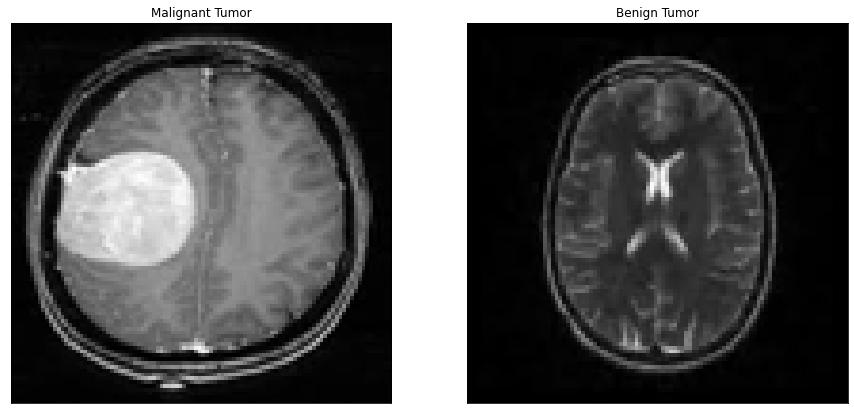

In [15]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(data[0])
plt.title('Malignant Tumor')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(data[200])
plt.title('Benign Tumor')
plt.xticks([]) , plt.yticks([])

plt.show()


In [16]:
data = data.astype(np.float32)
labels = labels.astype(np.int32)
data = data/255

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test),np.shape(X_val),np.shape(y_val)

((161, 100, 100, 3),
 (161, 2),
 (51, 100, 100, 3),
 (51, 2),
 (41, 100, 100, 3),
 (41, 2))

In [20]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('Tumor: {}'.format(labels_dict[index]))
        plt.show()


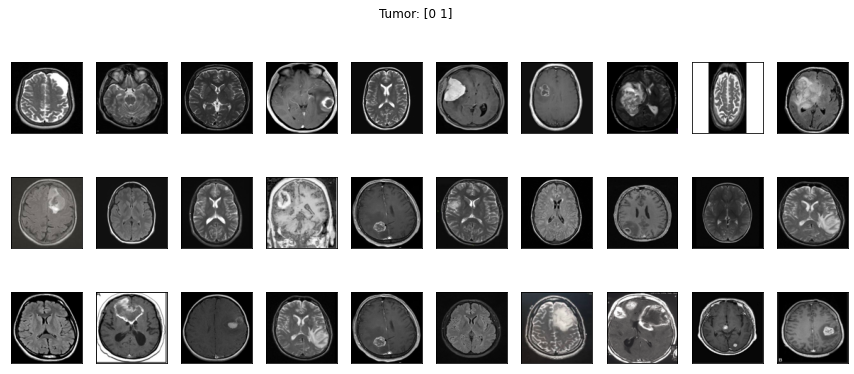

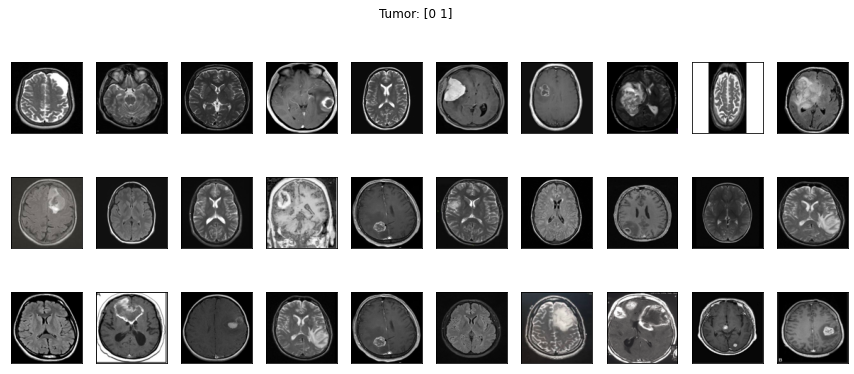

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [21]:
plot_samples(X_train, y_train, labels, 30)

In [25]:
# set the paramters we want to change randomly
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)


In [26]:
num_classes = 2
input_shape = (100,100,3)

In [27]:
y_train

array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1,

In [37]:
def createCNNModel():
    model=Sequential()
    model.add(Convolution2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same')) 
    model.add(Dropout(0.45))
    
    model.add(Convolution2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same')) 
    model.add(Dropout(0.25))
    
    model.add(Convolution2D(filters=36,kernel_size=9, padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same')) 
    model.add(Dropout(0.25))
    
    #model.add(Convolution2D(64,3,input_shape=input_shape,padding = 'same',activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2),padding='same'))
    #model.add(Convolution2D(96,3,padding = 'same',input_shape=input_shape,activation='relu'))
    #model.add(MaxPool2D(pool_size=(2,2),strides = (2,2),padding='same'))
    #model.add(Convolution2D(96,3,padding = 'same',input_shape=input_shape,activation='relu'))
    #model.add(MaxPool2D(pool_size=(2,2),strides = (2,2),padding='same'))
    
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(2,activation='sigmoid'))
    return model

In [38]:
model=createCNNModel()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 36)       

In [45]:
batch_size=128
epochs=200

In [48]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
History = model.fit_generator(demo_datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
1/1 [==============================] - 0s 405ms/step - loss: 0.7614 - accuracy: 0.3906 - val_loss: 0.7856 - val_accuracy: 0.6098
Epoch 2/200
1/1 [==============================] - 0s 193ms/step - loss: 1.9024 - accuracy: 0.5152 - val_loss: 0.6728 - val_accuracy: 0.6098
Epoch 3/200
1/1 [==============================] - 0s 197ms/step - loss: 0.6363 - accuracy: 0.6970 - val_loss: 0.6862 - val_accuracy: 0.6098
Epoch 4/200
1/1 [==============================] - 0s 193ms/step - loss: 0.6752 - accuracy: 0.6970 - val_loss: 0.6899 - val_accuracy: 0.6098
Epoch 5/200
1/1 [==============================] - 0s 173ms/step - loss: 0.6809 - accuracy: 0.6406 - val_loss: 0.6903 - val_accuracy: 0.6098
Epoch 6/200
1/1 [==============================] - 0s 201ms/step - loss: 0.6879 - accuracy: 0.5758 - val_loss: 0.6883 - val_accuracy: 0.6098
Epoch 7/200
1/1 [==============================] - 0s 170ms/step - loss: 0.683

Epoch 57/200
1/1 [==============================] - 0s 156ms/step - loss: 0.6185 - accuracy: 0.6970 - val_loss: 0.6220 - val_accuracy: 0.6341
Epoch 58/200
1/1 [==============================] - 0s 154ms/step - loss: 0.5484 - accuracy: 0.7273 - val_loss: 0.6253 - val_accuracy: 0.6098
Epoch 59/200
1/1 [==============================] - 0s 143ms/step - loss: 0.5812 - accuracy: 0.7188 - val_loss: 0.6299 - val_accuracy: 0.6341
Epoch 60/200
1/1 [==============================] - 0s 144ms/step - loss: 0.5677 - accuracy: 0.7109 - val_loss: 0.6353 - val_accuracy: 0.6341
Epoch 61/200
1/1 [==============================] - 0s 163ms/step - loss: 0.5009 - accuracy: 0.7576 - val_loss: 0.6480 - val_accuracy: 0.6341
Epoch 62/200
1/1 [==============================] - 0s 170ms/step - loss: 0.6476 - accuracy: 0.6364 - val_loss: 0.6453 - val_accuracy: 0.6341
Epoch 63/200
1/1 [==============================] - 0s 143ms/step - loss: 0.5677 - accuracy: 0.6875 - val_loss: 0.6395 - val_accuracy: 0.6341
Epoch 

1/1 [==============================] - 0s 193ms/step - loss: 0.4577 - accuracy: 0.7891 - val_loss: 0.6819 - val_accuracy: 0.7073
Epoch 115/200
1/1 [==============================] - 0s 152ms/step - loss: 0.5554 - accuracy: 0.7578 - val_loss: 0.6744 - val_accuracy: 0.6829
Epoch 116/200
1/1 [==============================] - 0s 153ms/step - loss: 0.4830 - accuracy: 0.7891 - val_loss: 0.6634 - val_accuracy: 0.7073
Epoch 117/200
1/1 [==============================] - 0s 173ms/step - loss: 0.6234 - accuracy: 0.7576 - val_loss: 0.6330 - val_accuracy: 0.7073
Epoch 118/200
1/1 [==============================] - 0s 151ms/step - loss: 0.5192 - accuracy: 0.7656 - val_loss: 0.6180 - val_accuracy: 0.7073
Epoch 119/200
1/1 [==============================] - 0s 171ms/step - loss: 0.4719 - accuracy: 0.8485 - val_loss: 0.6140 - val_accuracy: 0.7073
Epoch 120/200
1/1 [==============================] - 0s 162ms/step - loss: 0.4563 - accuracy: 0.7812 - val_loss: 0.6162 - val_accuracy: 0.7073
Epoch 121/200

1/1 [==============================] - 0s 285ms/step - loss: 0.4562 - accuracy: 0.7891 - val_loss: 0.6287 - val_accuracy: 0.7073
Epoch 172/200
1/1 [==============================] - 0s 167ms/step - loss: 0.4178 - accuracy: 0.7576 - val_loss: 0.6515 - val_accuracy: 0.7073
Epoch 173/200
1/1 [==============================] - 0s 169ms/step - loss: 0.5221 - accuracy: 0.7576 - val_loss: 0.6750 - val_accuracy: 0.7073
Epoch 174/200
1/1 [==============================] - 0s 171ms/step - loss: 0.3332 - accuracy: 0.9091 - val_loss: 0.7046 - val_accuracy: 0.7073
Epoch 175/200
1/1 [==============================] - 0s 154ms/step - loss: 0.4431 - accuracy: 0.8203 - val_loss: 0.7129 - val_accuracy: 0.7073
Epoch 176/200
1/1 [==============================] - 0s 152ms/step - loss: 0.4977 - accuracy: 0.7891 - val_loss: 0.6872 - val_accuracy: 0.6829
Epoch 177/200
1/1 [==============================] - 0s 170ms/step - loss: 0.5145 - accuracy: 0.7576 - val_loss: 0.6504 - val_accuracy: 0.6829
Epoch 178/200

In [49]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 28ms/step - loss: 0.6479 - accuracy: 0.7647


[0.647940993309021, 0.7647058963775635]

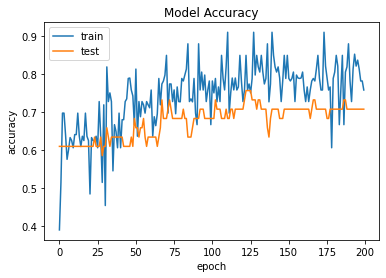

In [50]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

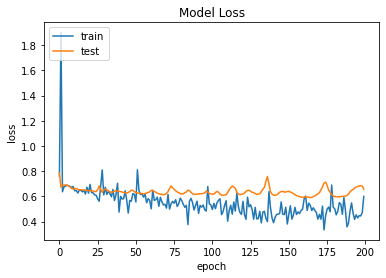

In [52]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
y_pred=model.predict(X_test)
y_pred =(y_pred>0.5)

In [54]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.57      0.68        23
     Class 1       0.72      0.93      0.81        28

   micro avg       0.76      0.76      0.76        51
   macro avg       0.79      0.75      0.75        51
weighted avg       0.79      0.76      0.75        51
 samples avg       0.76      0.76      0.76        51



In [55]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7647058963775635


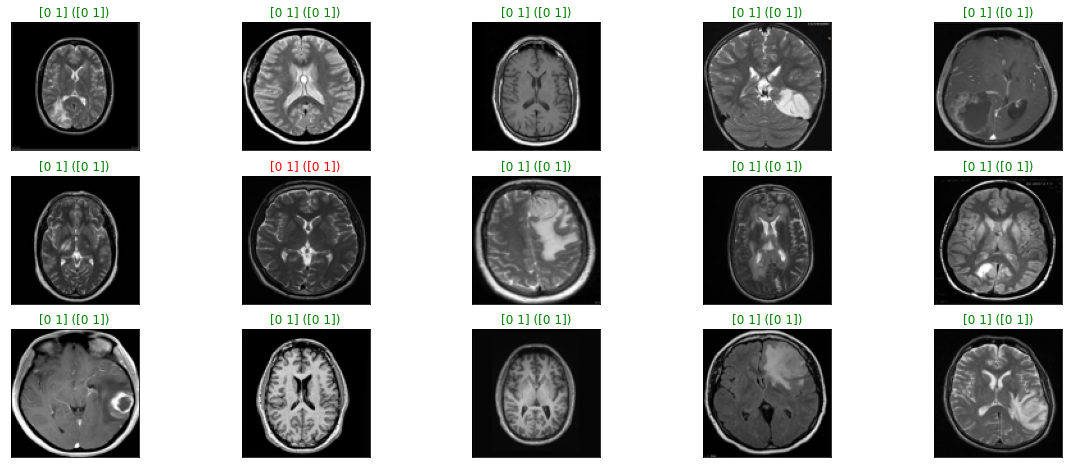

In [61]:
y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()
